In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [2]:
%%time
train_data = pd.read_csv("../input/train_ver2.csv")

<string>:2: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.


Wall time: 1min 49s


# 데이터 탐색 ( EDA )

- 데이터의 타입이 무엇인가?
- 각 변수들이 의미하는 것이 무엇인가?
- 중복된 변수가 있는가?
- 결측치는 존재하는가? => 존재한다면 결측치를 그냥 제거할 것인가 0으로 처리할 것인가?
- 숫자처럼 보이지만 문자인 것들이 존재하는가?
- 데이터의 분포는 어떻게 되는가?
- 갑자기 데이터의 비율이 변하는 시기가 있는가?

- 다변량 변수가 있는가? => Feature 엔지니어링
- histogram, boxplot, violinplot

이 모든 것은 끊임없이 가지고 놀아야 한다..!!! 이 과정을 소홀히하지 말자

In [3]:
%%time
print(train_data.columns)
print(train_data.head())
print(train_data.info())

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')
   fecha_dato  ncodpers ind_empleado pais_residencia sexo  age  fecha_alta

In [4]:
%%time
# check numerical data
num_cols = ['ncodpers','ind_nuevo','indrel','tipodom', \
            'cod_prov','ind_actividad_cliente','renta', \
            'age','antiguedad']
print(train_data[num_cols].describe())


           ncodpers     ind_nuevo        indrel     tipodom      cod_prov  \
count  1.364731e+07  1.361958e+07  1.361958e+07  13619574.0  1.355372e+07   
mean   8.349042e+05  5.956184e-02  1.178399e+00         1.0  2.657147e+01   
std    4.315650e+05  2.366733e-01  4.177469e+00         0.0  1.278402e+01   
min    1.588900e+04  0.000000e+00  1.000000e+00         1.0  1.000000e+00   
25%    4.528130e+05  0.000000e+00  1.000000e+00         1.0  1.500000e+01   
50%    9.318930e+05  0.000000e+00  1.000000e+00         1.0  2.800000e+01   
75%    1.199286e+06  0.000000e+00  1.000000e+00         1.0  3.500000e+01   
max    1.553689e+06  1.000000e+00  9.900000e+01         1.0  5.200000e+01   

       ind_actividad_cliente         renta  
count           1.361958e+07  1.085293e+07  
mean            4.578105e-01  1.342543e+05  
std             4.982169e-01  2.306202e+05  
min             0.000000e+00  1.202730e+03  
25%             0.000000e+00  6.871098e+04  
50%             0.000000e+00  1.0185

In [5]:
%%time
# check categorical columns
cat_cols = ['fecha_dato','ind_empleado','pais_residencia', \
            'sexo','fecha_alta','ult_fec_cli_1t','indrel_1mes', \
            'tiprel_1mes','indresi','indext','conyuemp', \
            'canal_entrada','indfall','nomprov','segmento']

# num_unique, unique set
for col in cat_cols:
    uniq =np.unique(train_data[col].astype(str)) 
    print ('-'*50)
    print ('# col {}\t n_uniq {}\t unique {}'.format(col, len(uniq), uniq))

# 184 secs

--------------------------------------------------
# col fecha_dato	 n_uniq 17	 unique ['2015-01-28' '2015-02-28' '2015-03-28' '2015-04-28' '2015-05-28'
 '2015-06-28' '2015-07-28' '2015-08-28' '2015-09-28' '2015-10-28'
 '2015-11-28' '2015-12-28' '2016-01-28' '2016-02-28' '2016-03-28'
 '2016-04-28' '2016-05-28']
--------------------------------------------------
# col ind_empleado	 n_uniq 6	 unique ['A' 'B' 'F' 'N' 'S' 'nan']
--------------------------------------------------
# col pais_residencia	 n_uniq 119	 unique ['AD' 'AE' 'AL' 'AO' 'AR' 'AT' 'AU' 'BA' 'BE' 'BG' 'BM' 'BO' 'BR' 'BY' 'BZ'
 'CA' 'CD' 'CF' 'CG' 'CH' 'CI' 'CL' 'CM' 'CN' 'CO' 'CR' 'CU' 'CZ' 'DE' 'DJ'
 'DK' 'DO' 'DZ' 'EC' 'EE' 'EG' 'ES' 'ET' 'FI' 'FR' 'GA' 'GB' 'GE' 'GH' 'GI'
 'GM' 'GN' 'GQ' 'GR' 'GT' 'GW' 'HK' 'HN' 'HR' 'HU' 'IE' 'IL' 'IN' 'IS' 'IT'
 'JM' 'JP' 'KE' 'KH' 'KR' 'KW' 'KZ' 'LB' 'LT' 'LU' 'LV' 'LY' 'MA' 'MD' 'MK'
 'ML' 'MM' 'MR' 'MT' 'MX' 'MZ' 'NG' 'NI' 'NL' 'NO' 'NZ' 'OM' 'PA' 'PE' 'PH'
 'PK' 'PL' 'PR' 'PT' '

In [6]:
#  indrel_1mes	 n_uniq 10	 unique ['1' '1.0' '2' '2.0' '3' '3.0' '4' '4.0' 'P' 'nan'] - 이거 문제네 1 / 1.0 다름
#   tiprel_1mes	 n_uniq 6	 unique ['A' 'I' 'N' 'P' 'R' 'nan'] - n 은 정의가 없음 nan인건가

col :  fecha_dato


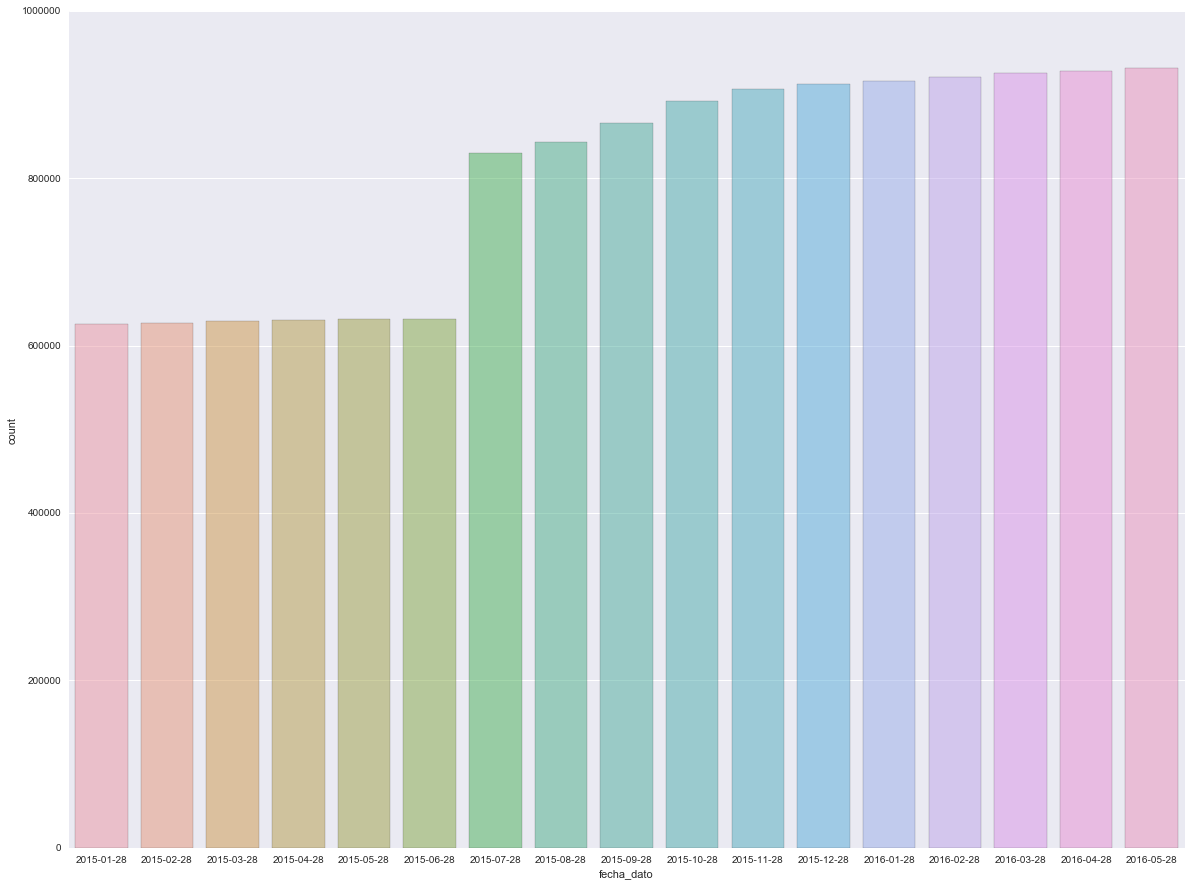

col :  ind_empleado


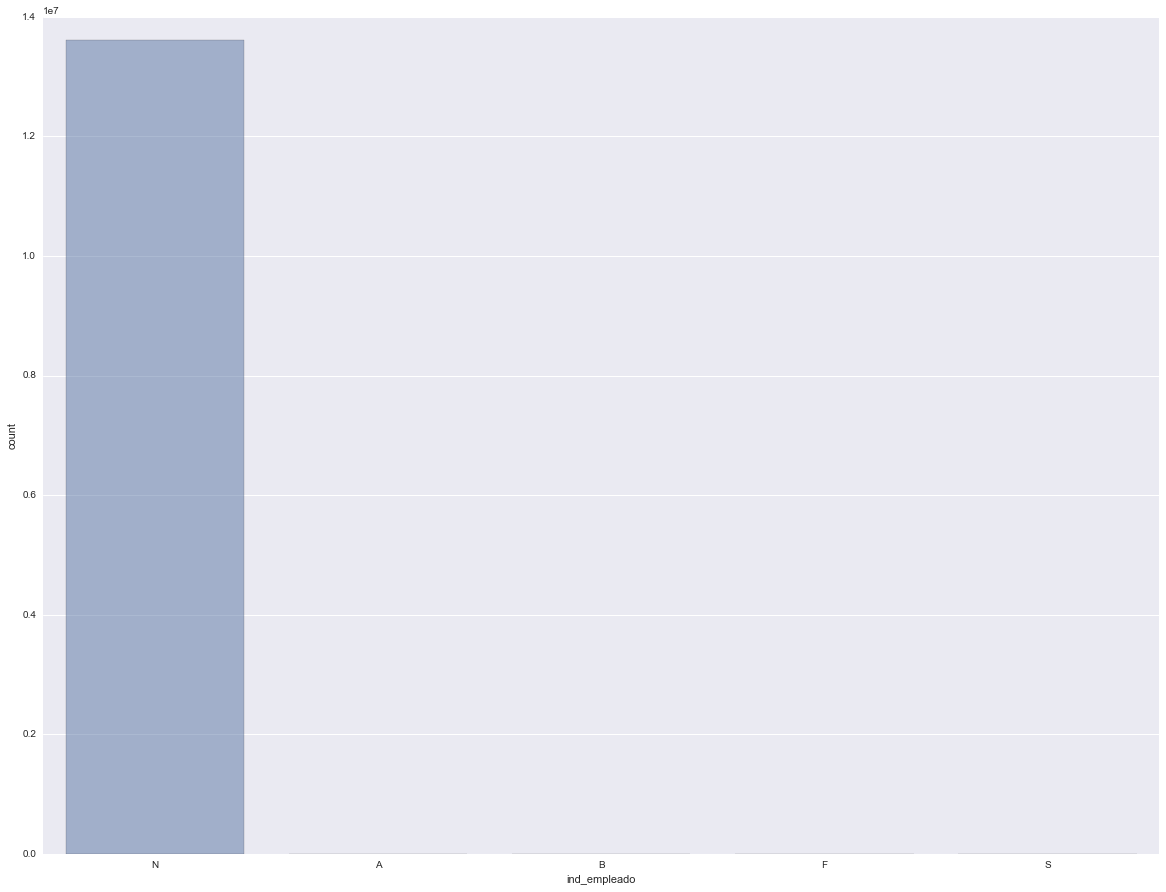

col :  pais_residencia


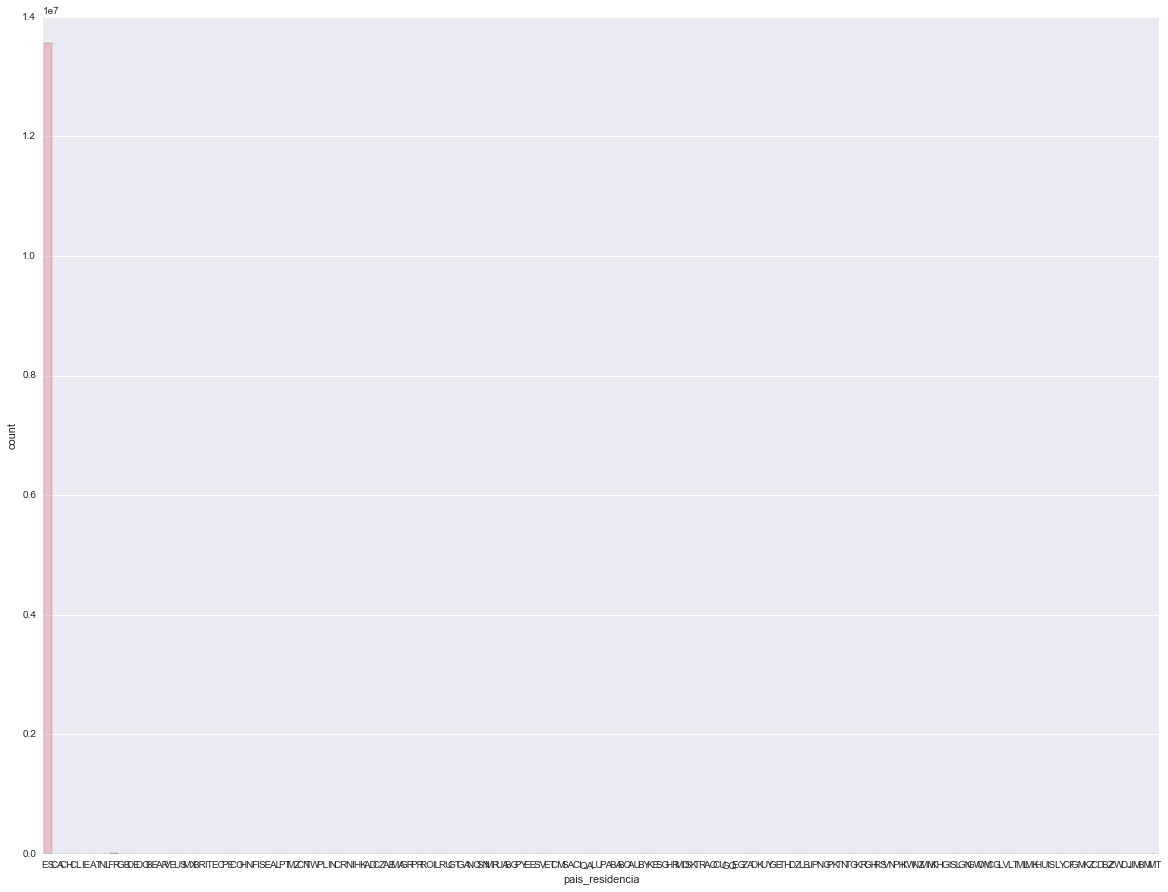

col :  sexo


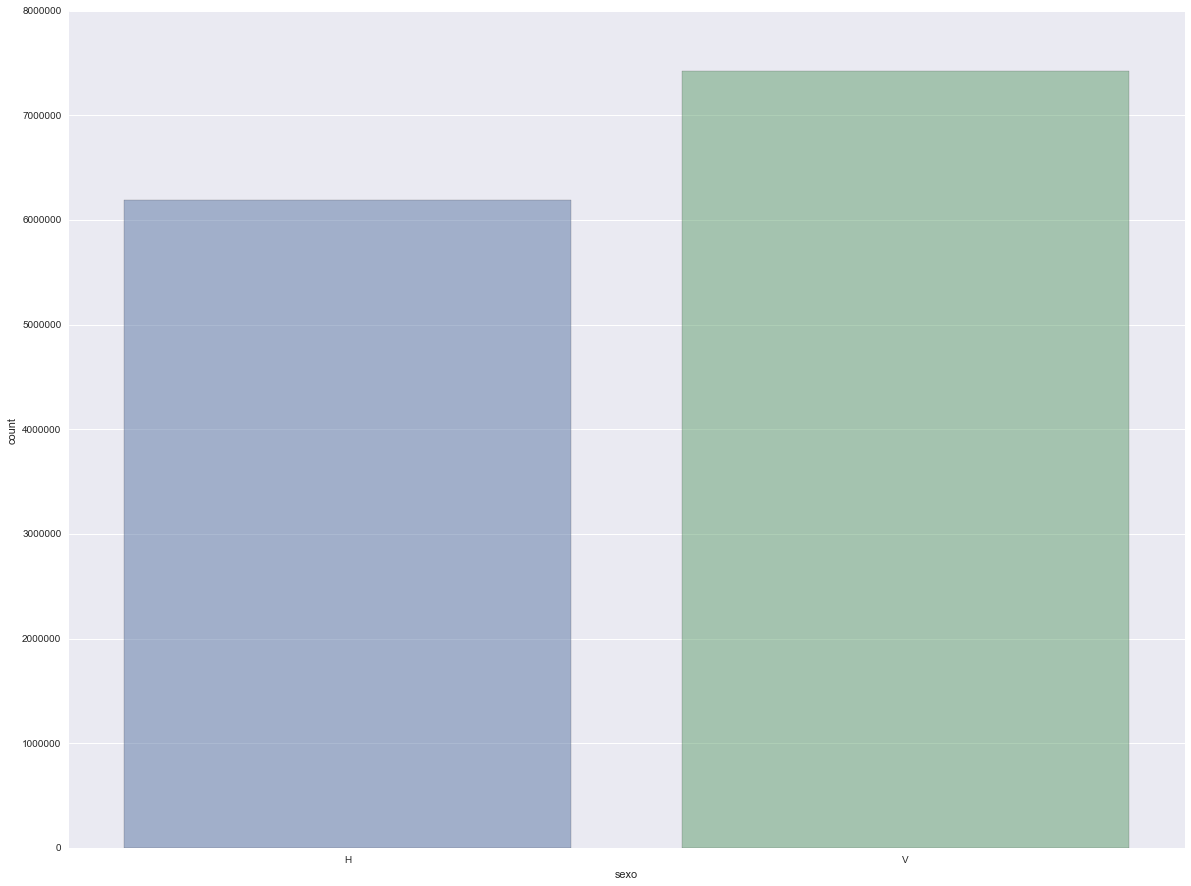

col :  age


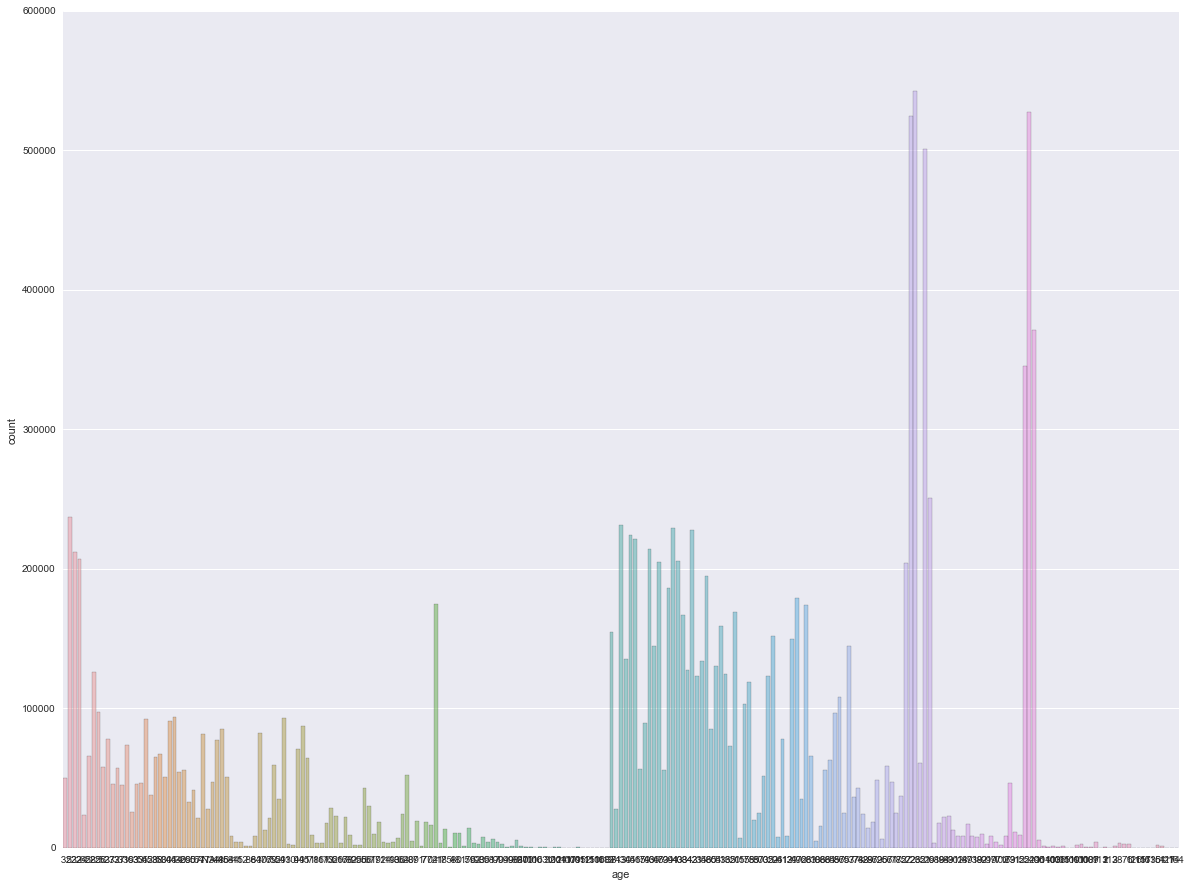

col :  fecha_alta


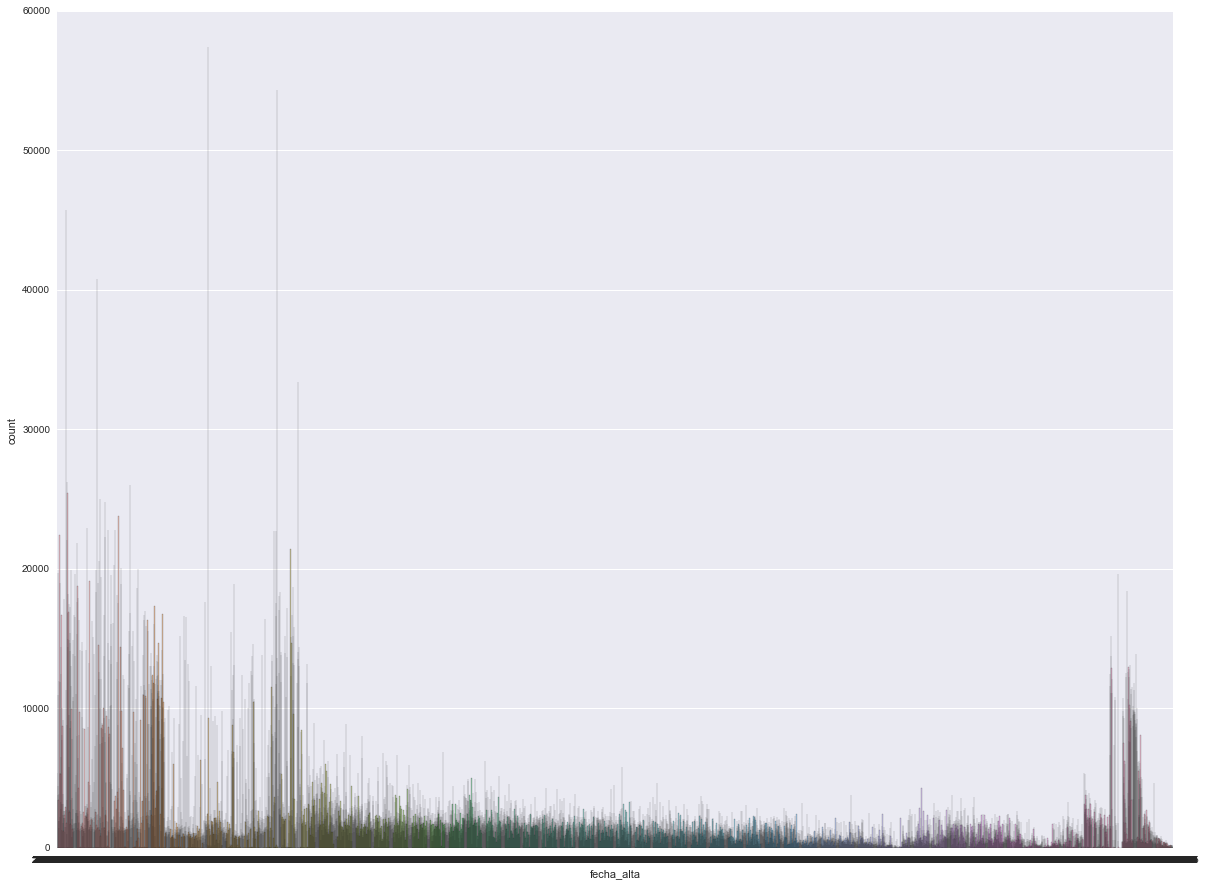

col :  ind_nuevo


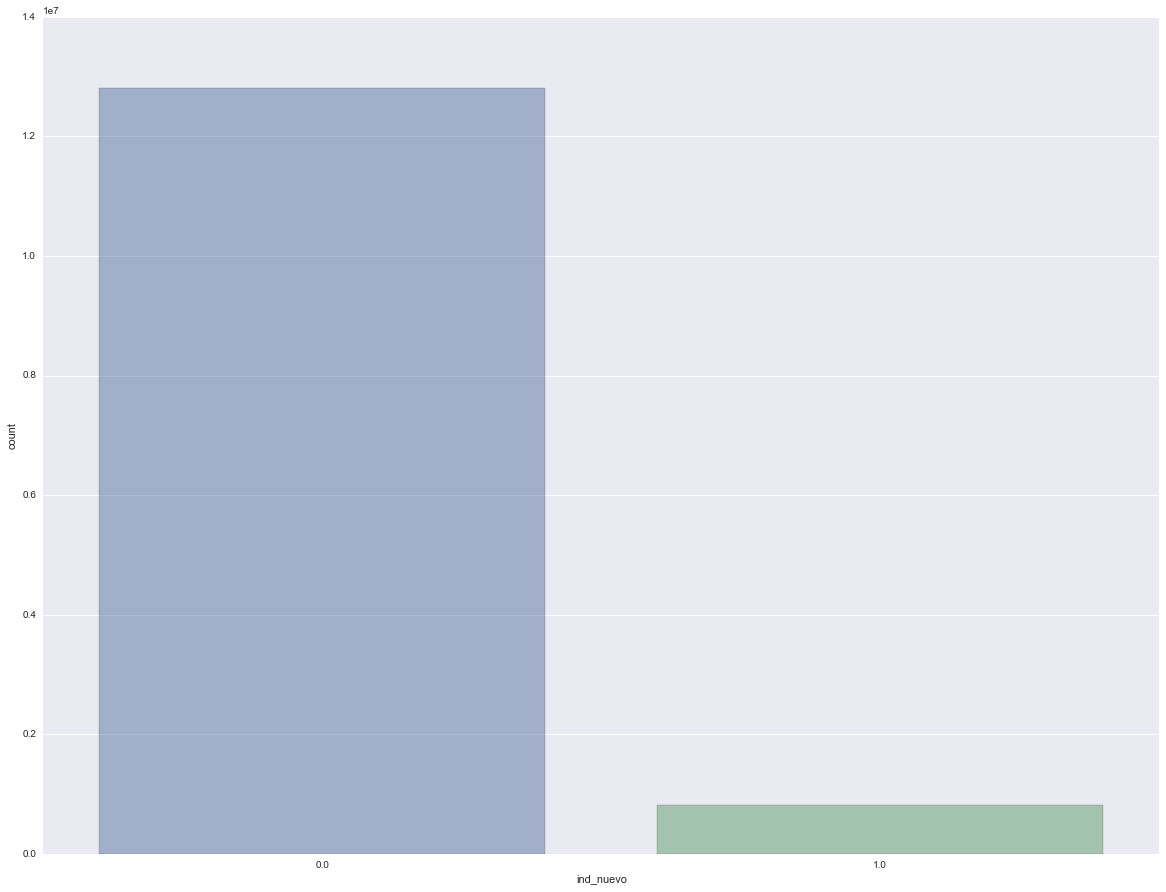

col :  antiguedad


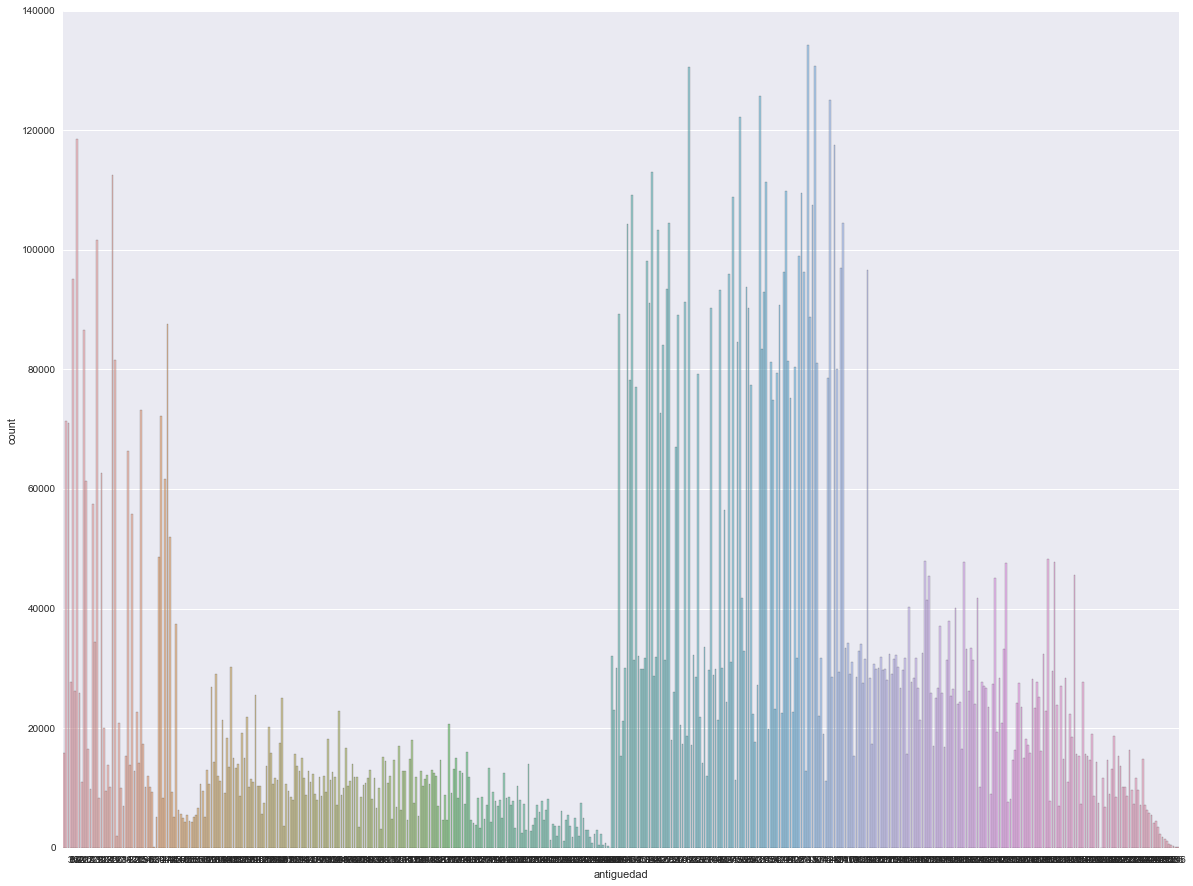

col :  indrel


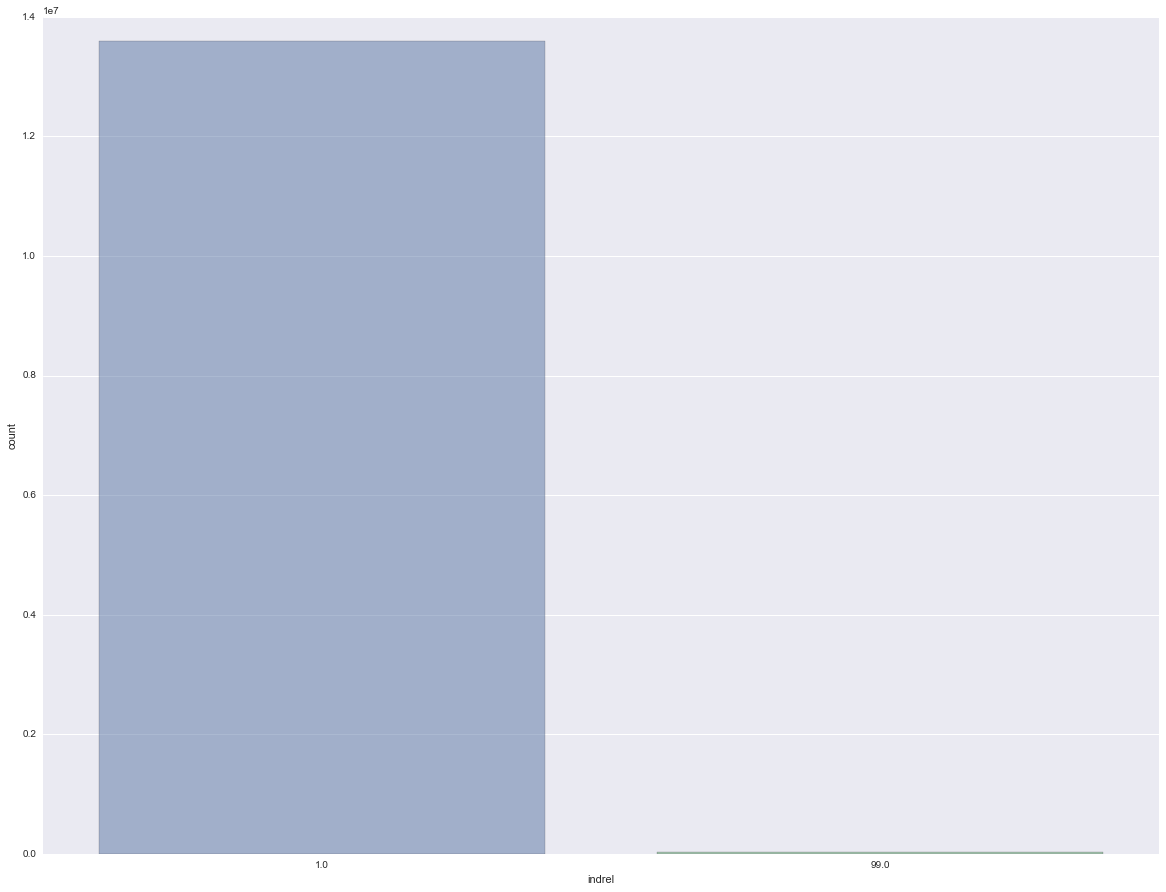

col :  ult_fec_cli_1t


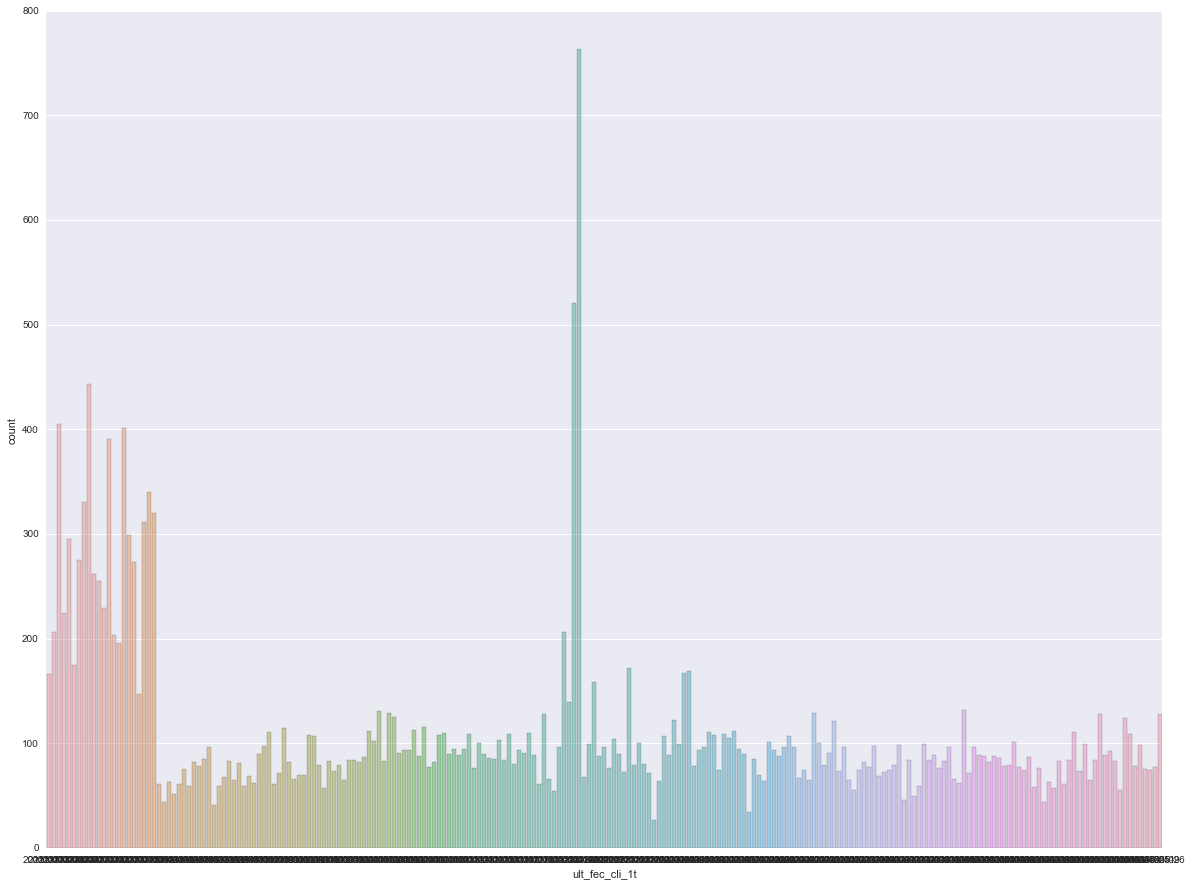

col :  indrel_1mes


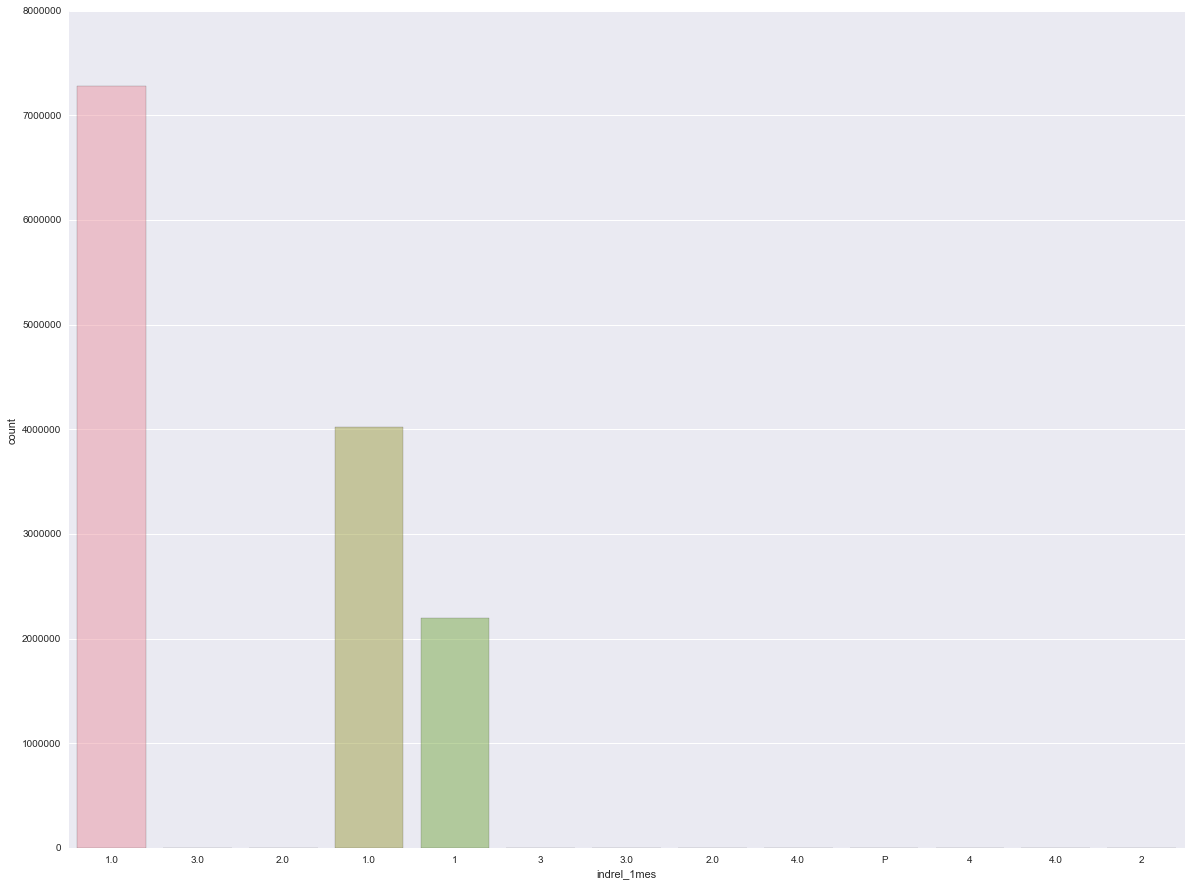

col :  tiprel_1mes


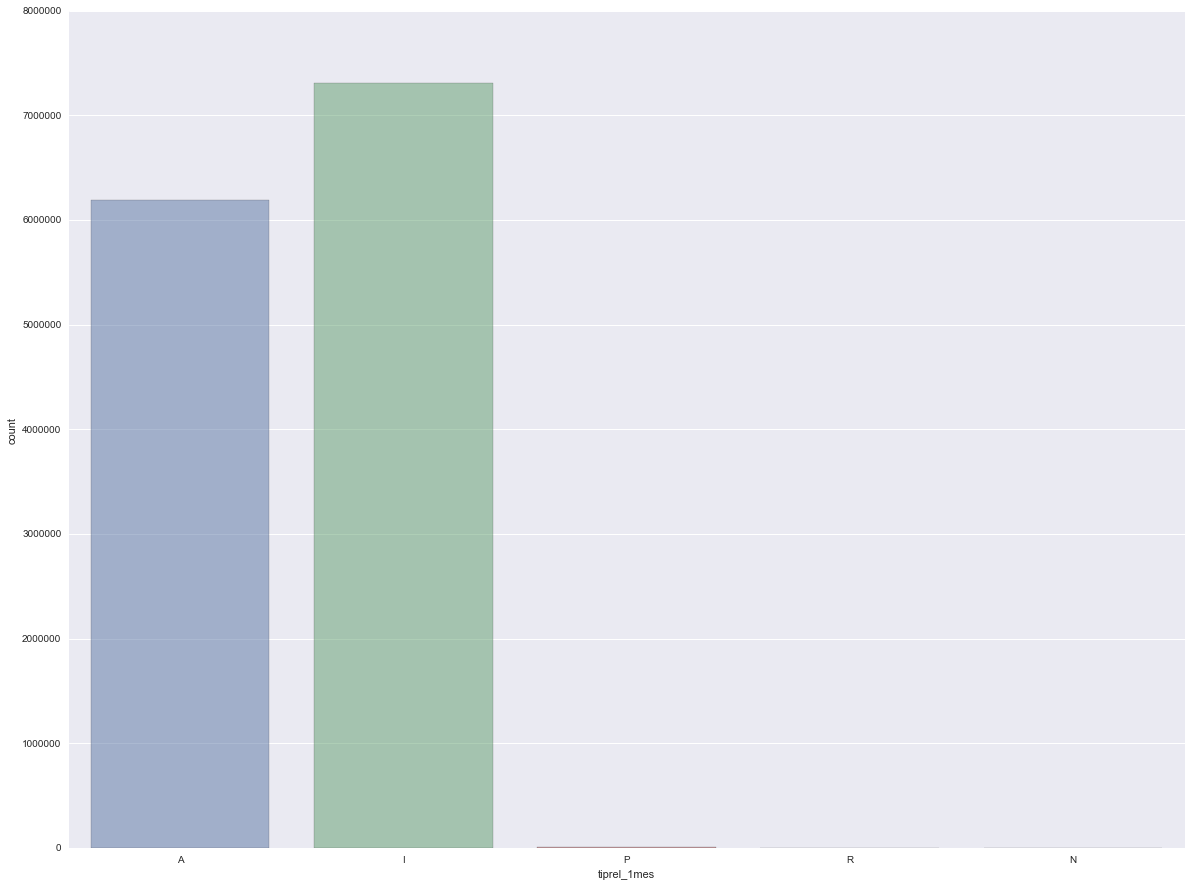

col :  indresi


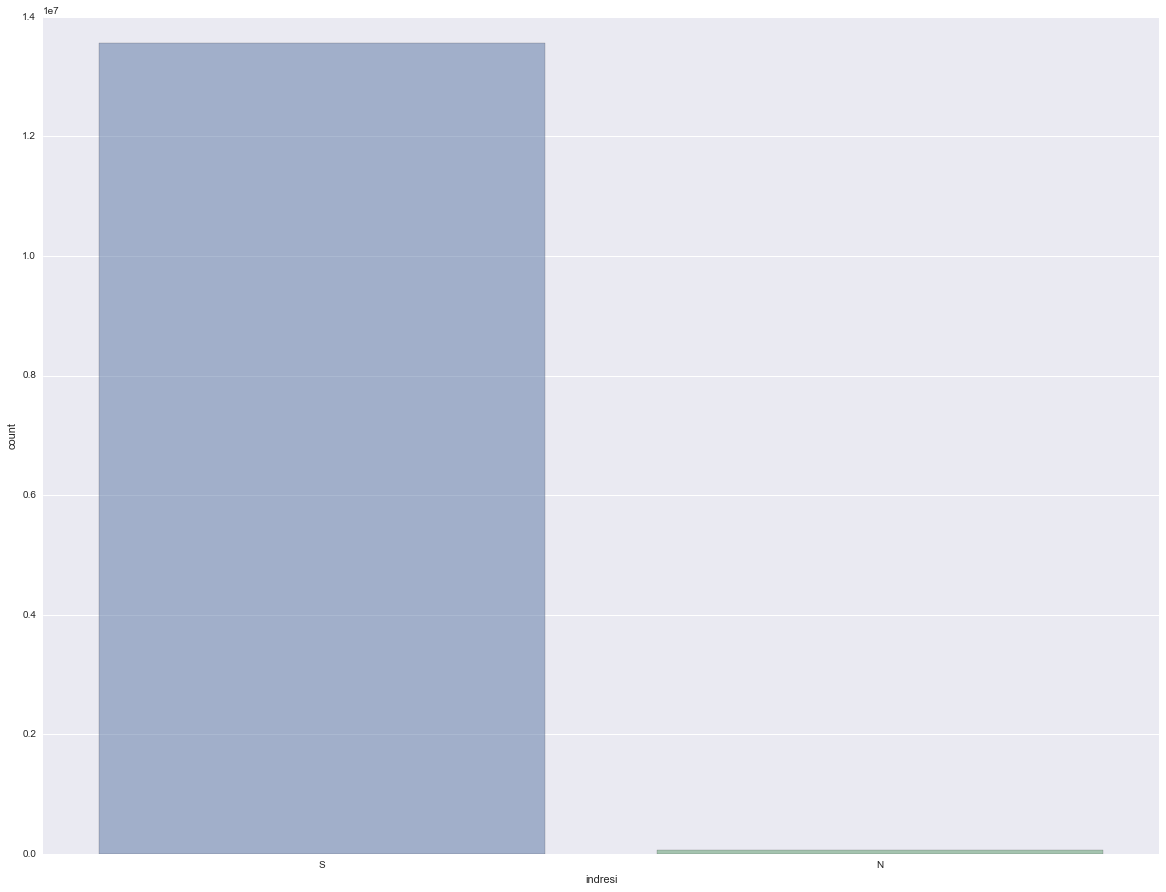

col :  indext


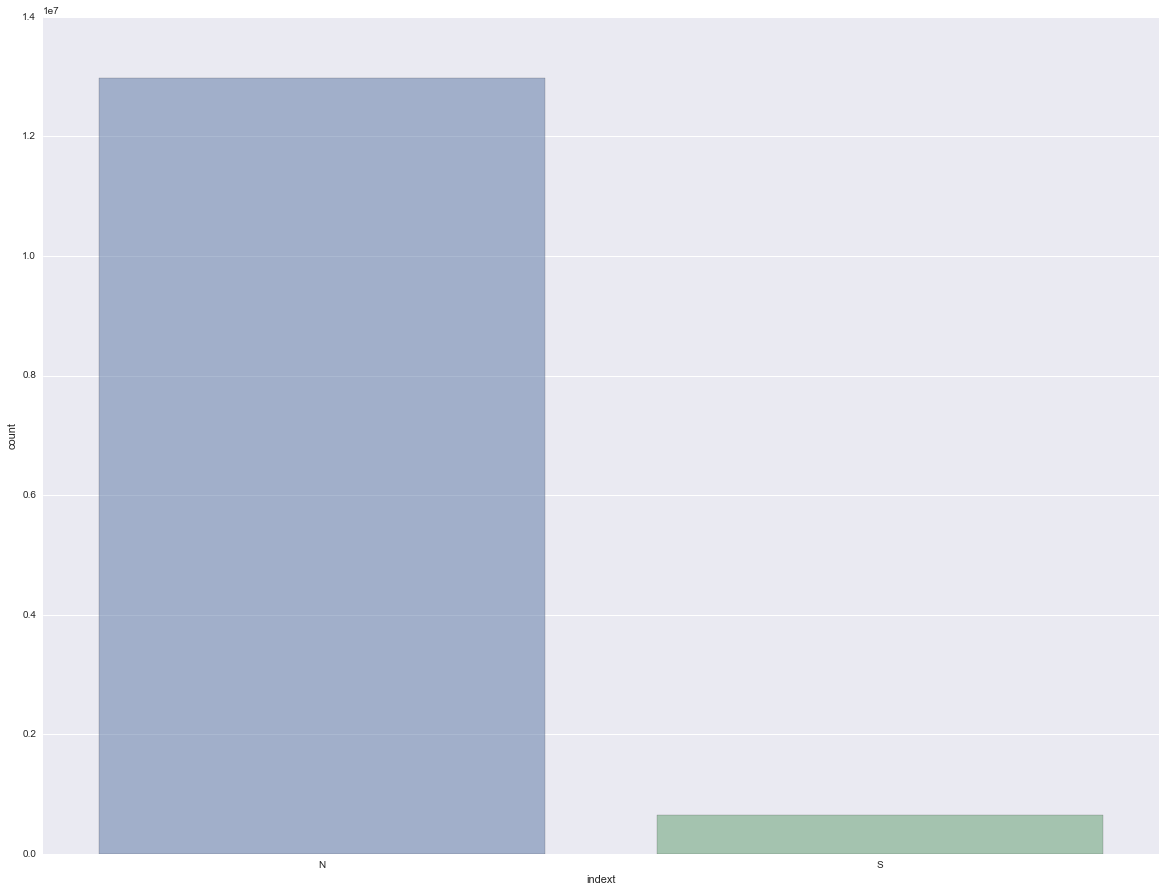

col :  conyuemp


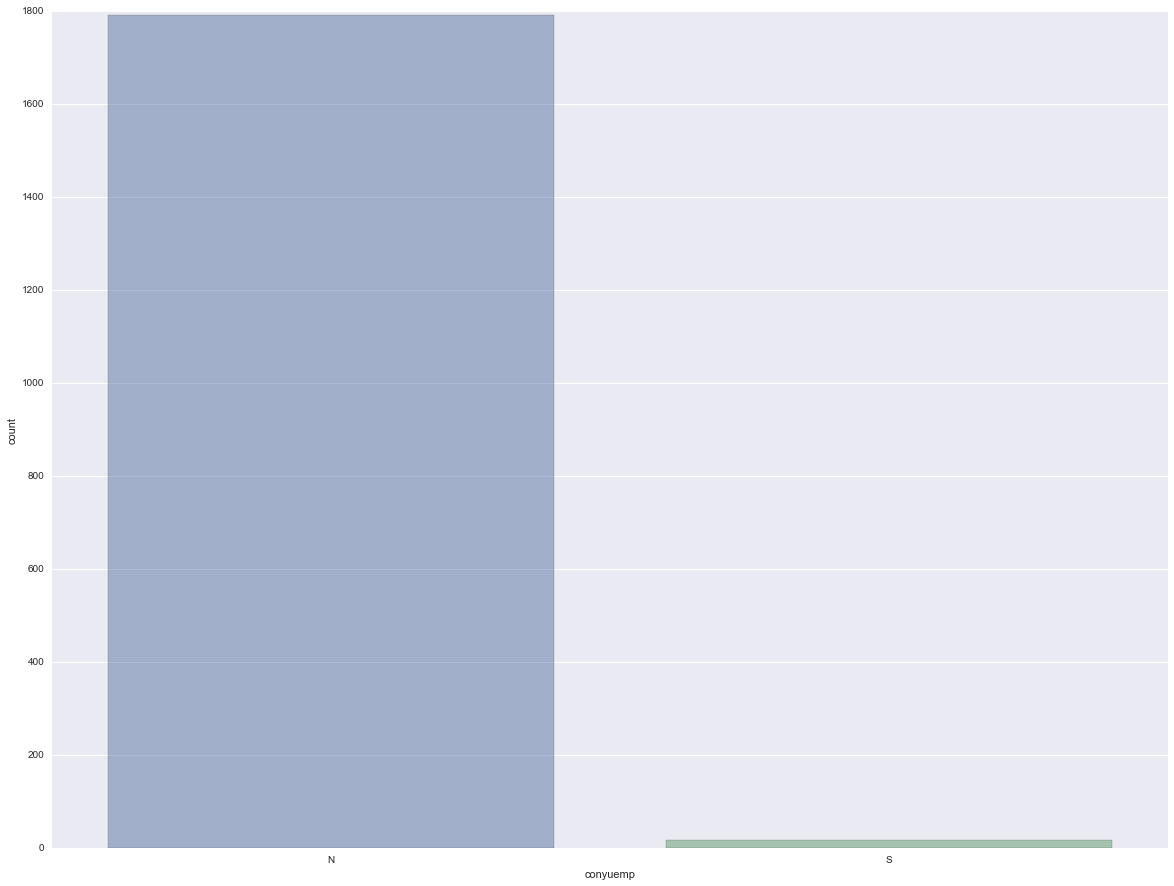

col :  canal_entrada


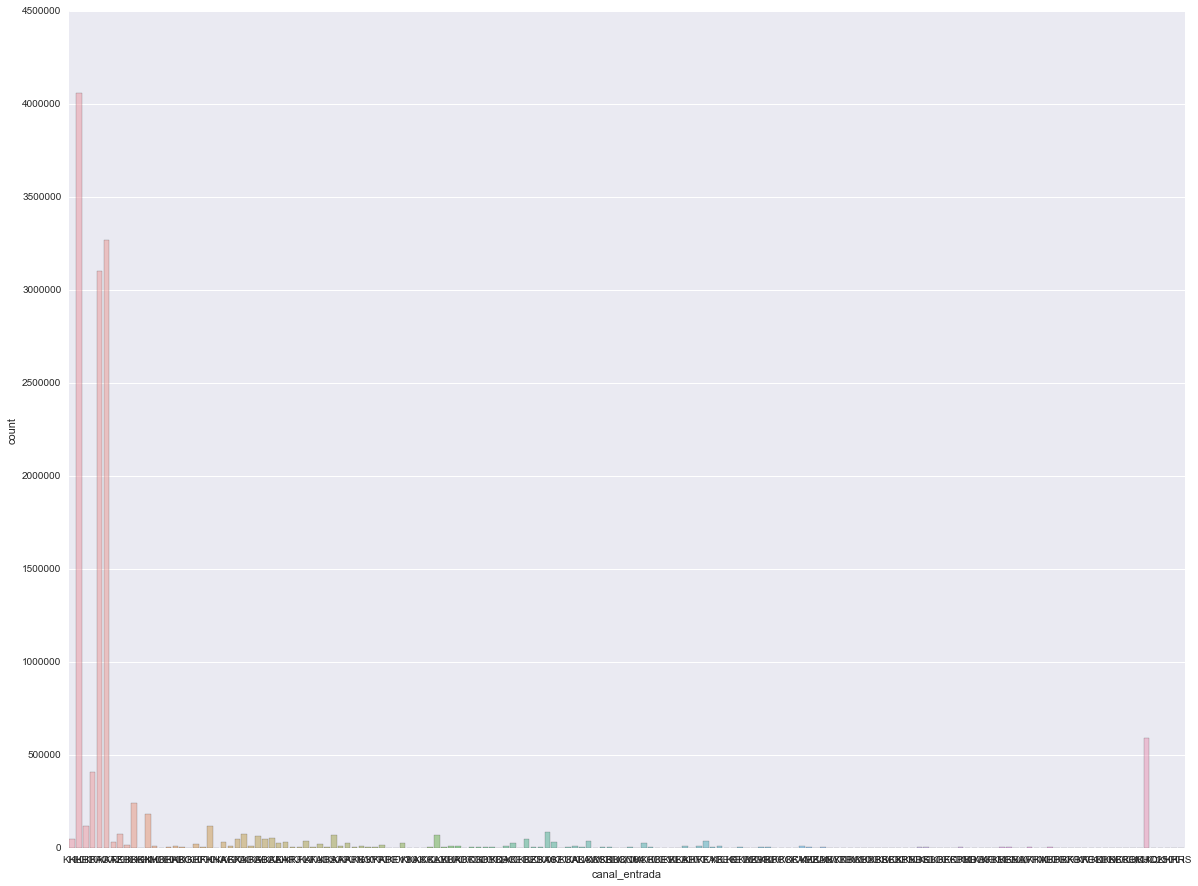

col :  indfall


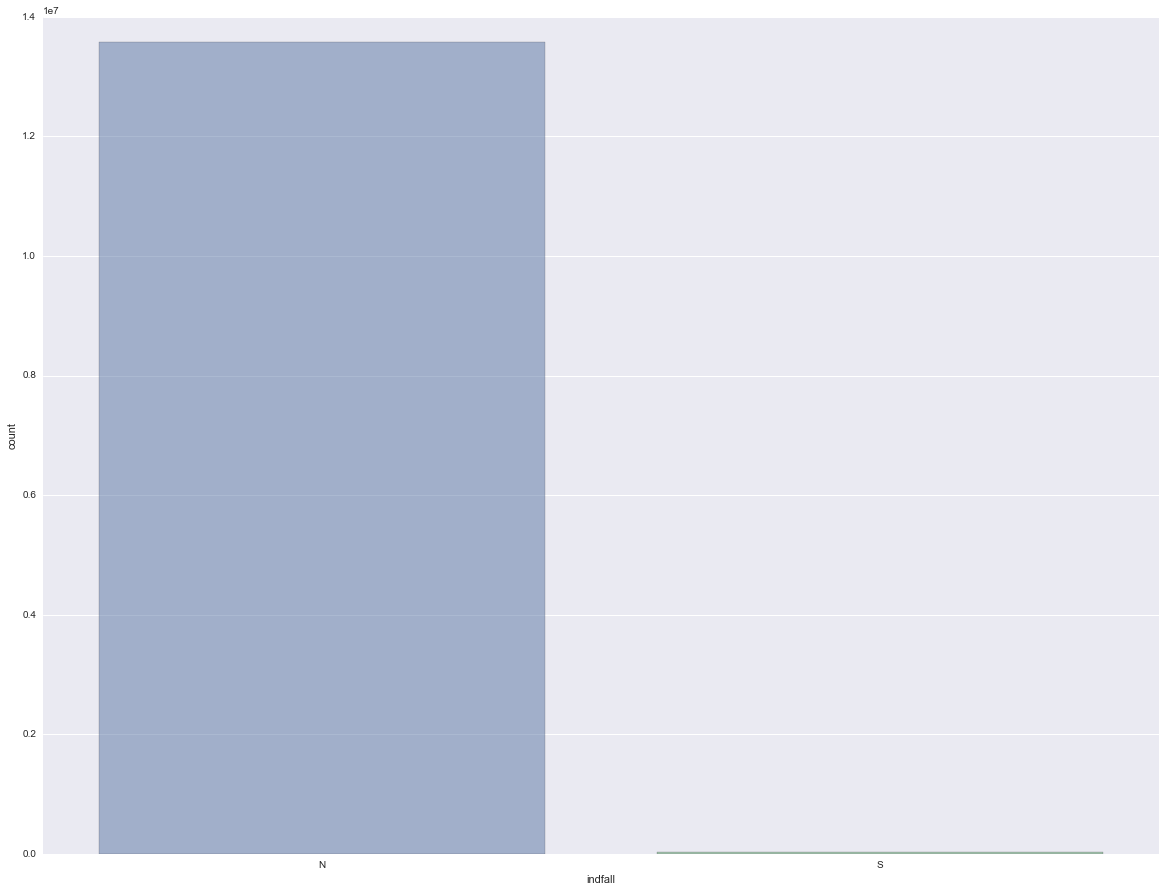

col :  tipodom


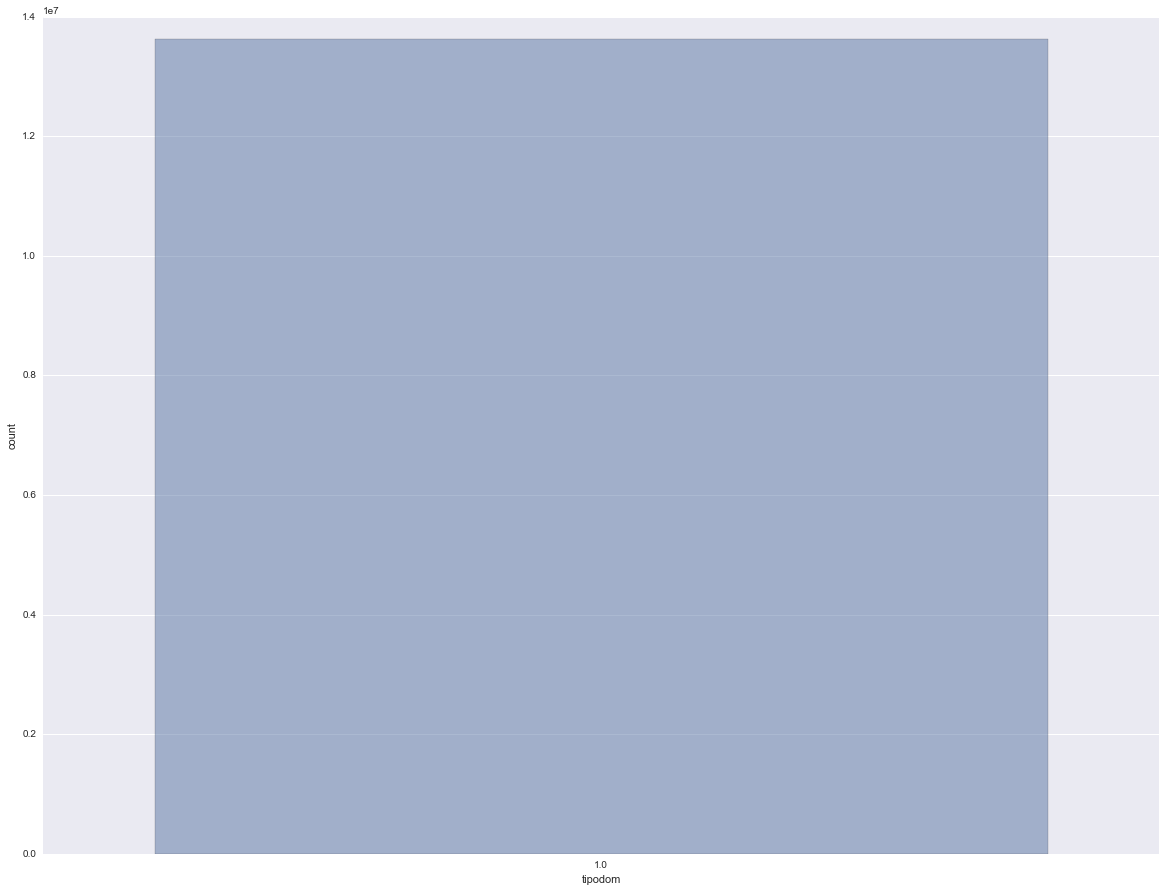

col :  cod_prov


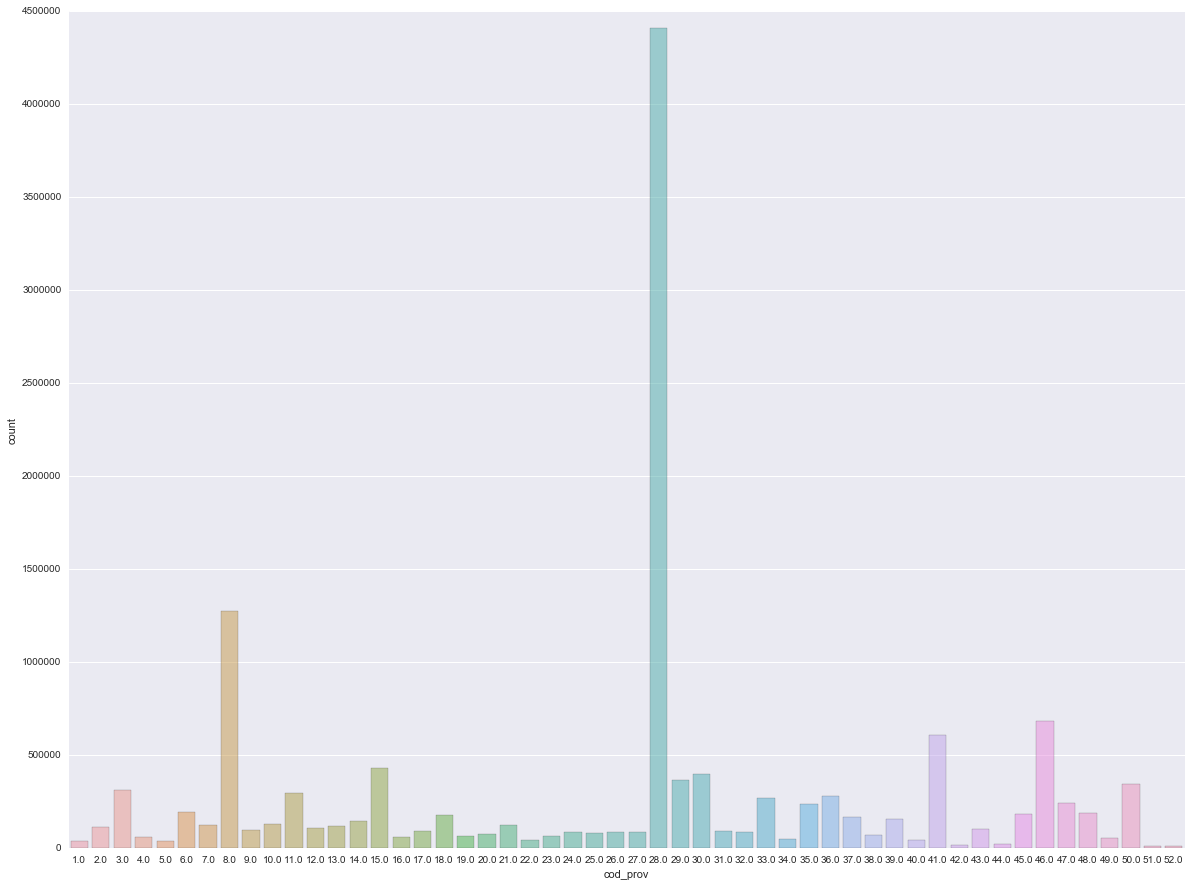

col :  nomprov


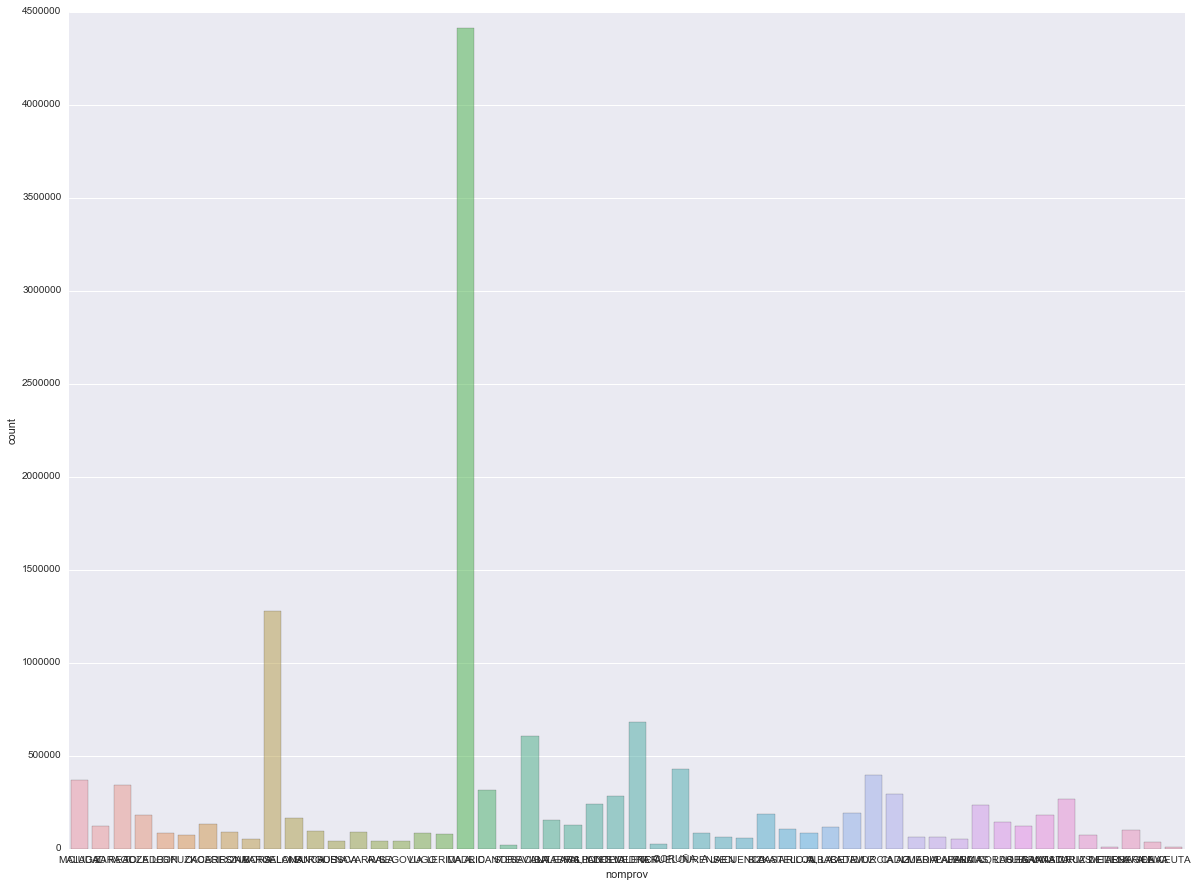

col :  ind_actividad_cliente


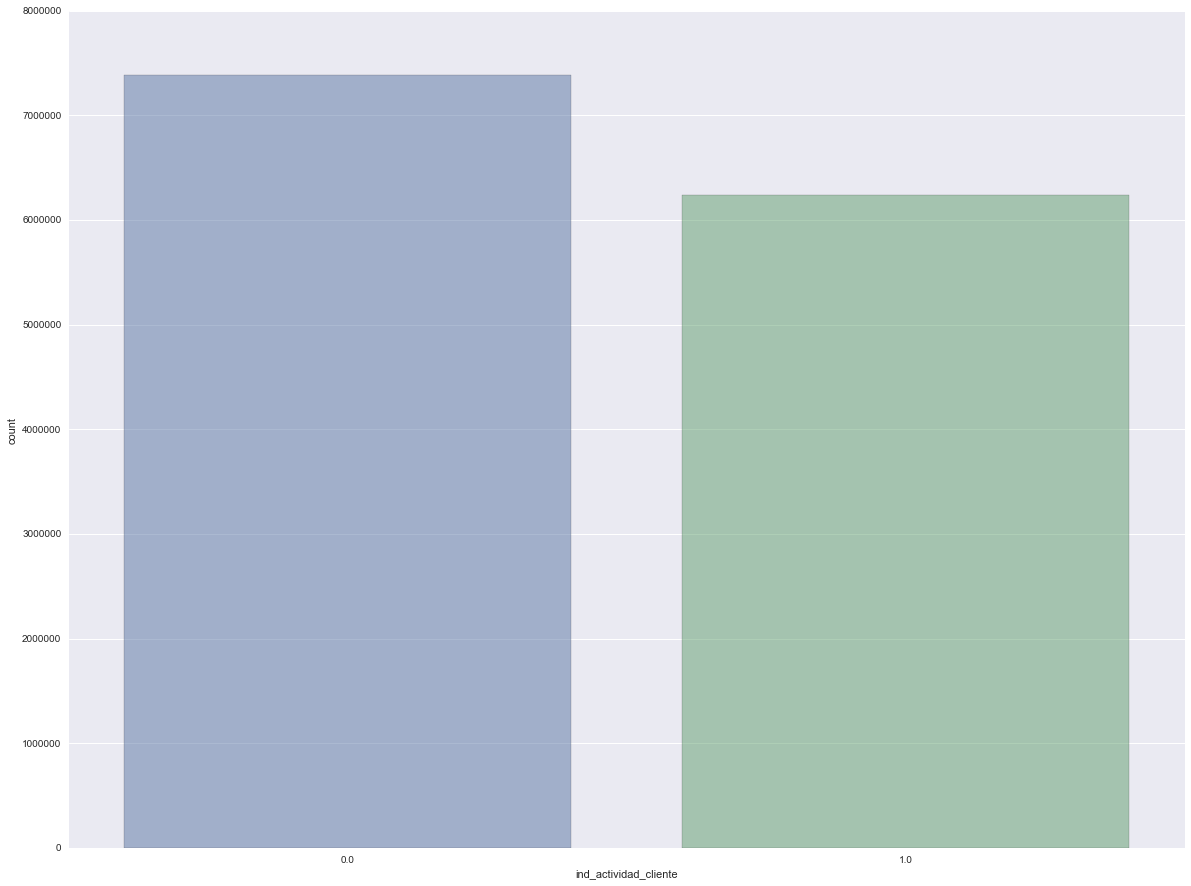

col :  renta


In [ ]:
# histogram of features
skip_cols = ['ncodpers']
for col in train_data.columns:
    if col in skip_cols:
        continue
    print ('='*50)
    print ('col : ', col)
    f, ax = plt.subplots(figsize=(20, 15))
    sns.countplot(x=col, data=train_data, alpha=0.5) # histogram
    plt.show()
